## Takeaway

In the game of 1-2 Takeaway, two players take turns removing either 1 or 2 matchsticks from a pile of $n$ matchsticks. The winner is the person to take the last matchstick.

There exists a simple "trick" to win at this game. This example shows how we can model inferring whether or not your opponent knows the "trick."

First, let's solve the game to figure out the trick…

In [1]:
from memo import memo
import jax
import jax.numpy as np
from enum import IntEnum
from functools import cache
from matplotlib import pyplot as plt

In [2]:
N = np.arange(21)
class Move(IntEnum):
    ONE = 1
    TWO = 2

@cache
@memo
def EU[n: N](t):
    player: knows(n)
    return (
        -1 if n == 0 else
        0 if t <= 0 else
        imagine[
            player: chooses(m in Move, wpp=(n >= m) * π[n, m](t)),
            player: chooses(n_ in N, wpp=n_ == n-m),
            -E[EU[player.n_](t - 1)]
        ]
    )

@cache
@memo
def π[n: N, m: Move](t):
    player: knows(n)
    player: chooses(m in Move, wpp=(n >= m) * exp(10 * (0 if t <= 0 else imagine[
        future_player: chooses(n_ in N, wpp=n_ == n-m),
        -E[EU[future_player.n_](t - 1)]
    ])))
    return Pr[player.m == m]

The optimal strategy is to take the number of matchsticks needed to leave a multiple of 3 for your opponent. If you are faced with a multiple of 3, you are indifferent.

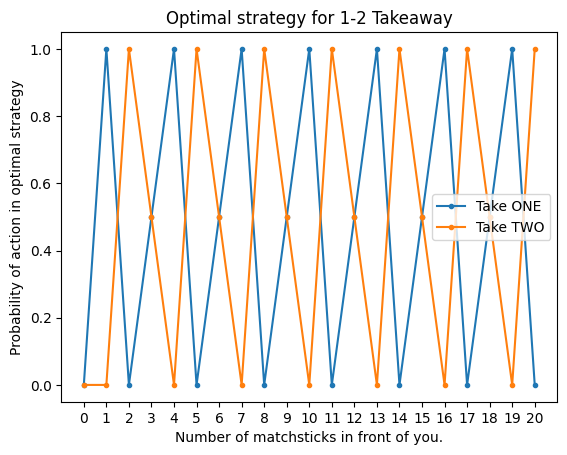

In [3]:
plt.plot(π(20), '.-', label=['Take ONE', 'Take TWO'])
plt.legend()
plt.xticks(np.arange(21))
plt.xlabel('Number of matchsticks in front of you.')
plt.ylabel('Probability of action in optimal strategy')
plt.title('Optimal strategy for 1-2 Takeaway')
None

Now let's model reasoning about an opponent who makes a "quick" correct move.

In [4]:
class Strategy(IntEnum):
    SHORT = 0
    THINK = 1

@memo
def quick[m: Move, s: Strategy](t):
    lab: chooses(n in N, wpp=n==t)
    lab: knows(s)
    lab: thinks[
        player: knows(n),
        player: chooses(s in Strategy, wpp=1),
        player: chooses(m in Move, wpp=π[n, m](t) if s == 0 else exp(π[n, m](t) * 500000 / (cost @ π(t))))
    ]
    lab: observes [player.m] is m
    return E[lab[Pr[player.s == s]]]

In [5]:
m = quick(20)
%timeit -r 10 -n 100 quick(20).block_until_ready()

69.8 μs ± 1.37 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)


As $n$ increases, we think it is likelier that they know the trick — though if $n$ is a multiple of 3, then we aren't sure.

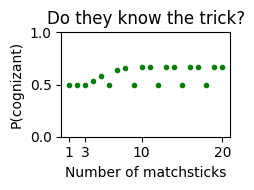

In [6]:
plt.figure(figsize=(2.5, 2))
for t in N[1:].tolist():
    plt.plot([t], [(π(t)[t] @ quick(t))[0]], 'g.')
plt.ylim(0, 1)
# plt.axhline(0.5, ls=':', color='k')
plt.xlabel('Number of matchsticks')
plt.xticks([1, 3, 10, 20])
plt.ylabel('P(cognizant)')
plt.title('Do they know the trick?')
plt.tight_layout()
plt.savefig('../paper/fig/nim.pdf')